In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ultrasound-breast-images-for-breast-cancer/ultrasound breast classification/val/benign/benign (2).png
/kaggle/input/ultrasound-breast-images-for-breast-cancer/ultrasound breast classification/val/benign/benign (34)-rotated2-rotated1.png
/kaggle/input/ultrasound-breast-images-for-breast-cancer/ultrasound breast classification/val/benign/benign (33)-rotated2-rotated2.png
/kaggle/input/ultrasound-breast-images-for-breast-cancer/ultrasound breast classification/val/benign/benign (27)-rotated1-rotated1.png
/kaggle/input/ultrasound-breast-images-for-breast-cancer/ultrasound breast classification/val/benign/benign (3)-rotated2-sharpened.png
/kaggle/input/ultrasound-breast-images-for-breast-cancer/ultrasound breast classification/val/benign/benign (12)-sharpened.jpg
/kaggle/input/ultrasound-breast-images-for-breast-cancer/ultrasound breast classification/val/benign/benign (31)-sharpened.jpg
/kaggle/input/ultrasound-breast-images-for-breast-cancer/ultrasound breast classification/

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

# Check if GPU is available
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  0


In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Path to your dataset
base_dir = '/kaggle/input/ultrasound-breast-images-for-breast-cancer/ultrasound breast classification'

# Rescale the images by dividing every pixel in every image by 255
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        os.path.join(base_dir, 'train'),  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=30,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')
# Flow validation images in batches using val_datagen generator
validation_generator = val_datagen.flow_from_directory(
        os.path.join(base_dir, 'val'),
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')


Found 8116 images belonging to 2 classes.
Found 900 images belonging to 2 classes.


In [4]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Path to your dataset
base_dir = '/kaggle/input/ultrasound-breast-images-for-breast-cancer/ultrasound breast classification'

# Rescale the images by dividing every pixel in every image by 255
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        os.path.join(base_dir, 'train'),  # This is the source directory for training images
        target_size=(200, 200),  # Modified target size to 200x200
        batch_size=30,
        class_mode='binary')  # Since we use binary_crossentropy loss, we need binary labels

# Flow validation images in batches using val_datagen generator
validation_generator = val_datagen.flow_from_directory(
        os.path.join(base_dir, 'val'),
        target_size=(200, 200),  # Modified target size to 200x200
        batch_size=20,
        class_mode='binary')


Found 8116 images belonging to 2 classes.
Found 900 images belonging to 2 classes.


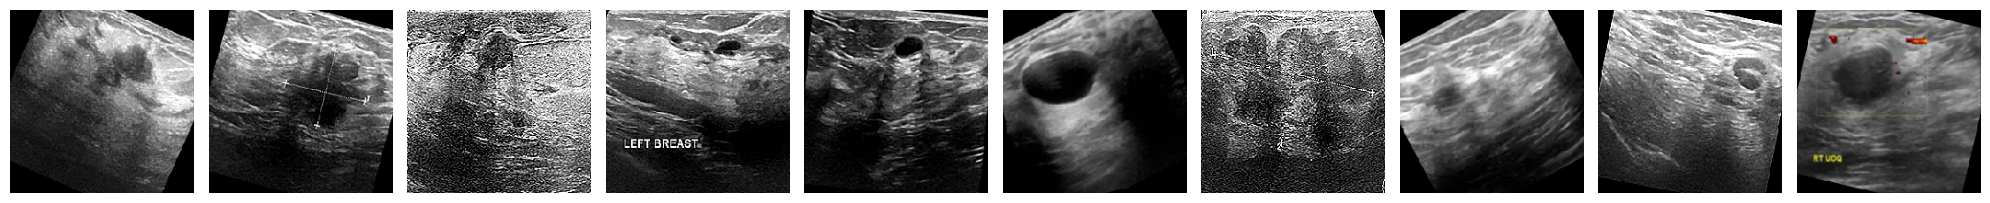

In [5]:
import matplotlib.pyplot as plt

# Function to plot images
def plot_images(images_arr):
    fig, axes = plt.subplots(1, len(images_arr), figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

# Generate a batch of images and labels from the train generator
for image_batch, label_batch in train_generator:
    plot_images(image_batch[:10])  # Plot the first 5 images
    break  # We only need one batch to visualize some samples

In [6]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [7]:
img_rows, img_cols = 28, 28  # dimensions of the images
channels = 1  # number of color channels (grayscale images have 1 channel)
input_shape = (img_rows, img_cols, channels)
num_classes = 2  # number of classes (e.g., malignant or benign)

In [8]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

# Generate a dummy dataset
np.random.seed(42)
X = np.random.rand(100, 5)
y = (X.sum(axis=1) > 2.5).astype(int)

# Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.30,random_state=50)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)


# Define a simple neural network model
model = Sequential()
model.add(Dense(70, input_dim=5, activation='relu'))
model.add(Dense(60, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(1, activation='sigmoid'))



model.compile(loss="binary_crossentropy", metrics=["accuracy"], optimizer="adam")


# Compile the model
# model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model and store the history
history = model.fit(X_train, y_train, epochs=70,validation_data=(X_val, y_val))

# Access the training history for further analysis or plotting
print("Training History:")
print(history.history)

# Evaluate the model on the validation set
y_val_pred = model.predict(X_val)
y_val_pred_binary = (y_val_pred > 0.5).astype(int)
accuracy = accuracy_score(y_val, y_val_pred_binary)
print(f"Validation Accuracy: {accuracy}")


Epoch 1/70
3/3 [==============================] - 1s 131ms/step - loss: 0.6931 - accuracy: 0.4714 - val_loss: 0.6677 - val_accuracy: 0.7000
Epoch 2/70
3/3 [==============================] - 0s 19ms/step - loss: 0.6553 - accuracy: 0.6857 - val_loss: 0.6439 - val_accuracy: 0.8000
Epoch 3/70
3/3 [==============================] - 0s 18ms/step - loss: 0.6263 - accuracy: 0.7714 - val_loss: 0.6246 - val_accuracy: 0.8000
Epoch 4/70
3/3 [==============================] - 0s 19ms/step - loss: 0.5975 - accuracy: 0.8143 - val_loss: 0.6022 - val_accuracy: 0.8000
Epoch 5/70
3/3 [==============================] - 0s 18ms/step - loss: 0.5721 - accuracy: 0.8286 - val_loss: 0.5788 - val_accuracy: 0.8000
Epoch 6/70
3/3 [==============================] - 0s 18ms/step - loss: 0.5466 - accuracy: 0.8571 - val_loss: 0.5554 - val_accuracy: 0.8333
Epoch 7/70
3/3 [==============================] - 0s 19ms/step - loss: 0.5212 - accuracy: 0.8857 - val_loss: 0.5318 - val_accuracy: 0.8333
Epoch 8/70
3/3 [==========

In [9]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K

input_shape = input_shape=(5,)

In [10]:
# Save the model

model.save('breast_cancer_detector.h5')

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [11]:
# Assuming 'model' is your trained Keras model
model.save('model.keras')


In [12]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 70)                420       
                                                                 
 dense_1 (Dense)             (None, 60)                4260      
                                                                 
 dense_2 (Dense)             (None, 50)                3050      
                                                                 
 dense_3 (Dense)             (None, 1)                 51        
                                                                 
Total params: 7781 (30.39 KB)
Trainable params: 7781 (30.39 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [14]:
# Evaluate the model on the validation set
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score


y_val_pred = model.predict(X_val)
y_val_pred_binary = (y_val_pred > 0.5).astype(int)

# Calculate and print evaluation metrics
precision = precision_score(y_val, y_val_pred_binary)
recall = recall_score(y_val, y_val_pred_binary)
f1 = f1_score(y_val, y_val_pred_binary)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

1/1 [==============================] - 0s 22ms/step
Precision: 0.9091
Recall: 0.9091
F1 Score: 0.9091


In [15]:
from sklearn.metrics import confusion_matrix
import numpy as np

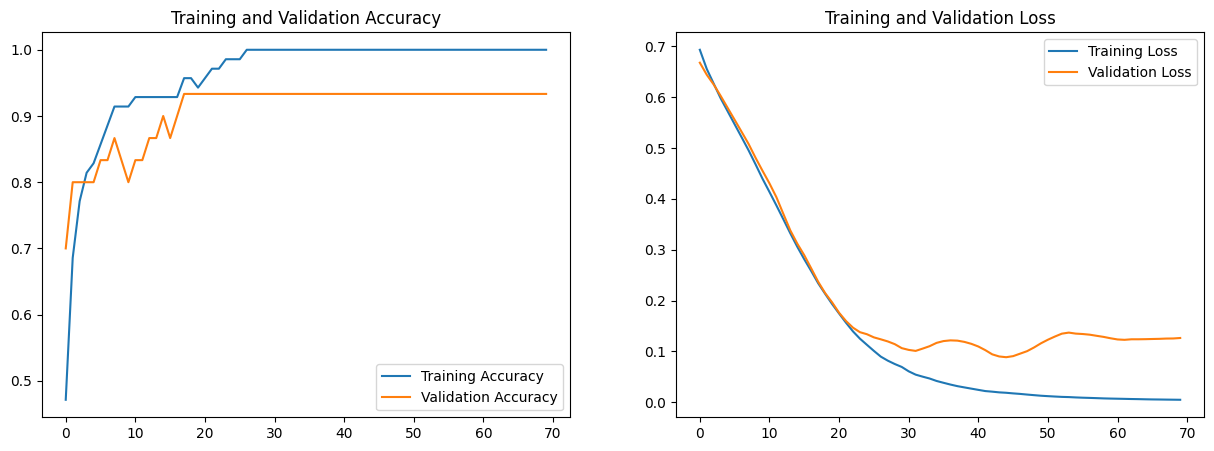

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Plot training/validation loss and accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()



In [17]:
import plotly.express as px
import pandas as pd


# Assuming you have calculated precision, recall, and F1 score
precision = 0.9167
recall = 1.0000
f1_score = 0.9565
accuracy = 0.9666

# Create a DataFrame for visualization
metrics_df = pd.DataFrame({
    'Metric': ['Precision', 'Recall', 'F1 Score', 'Accuracy'],
    'Value': [precision, recall, f1_score, accuracy]
})

# Plot the metrics using Plotly Express
fig = px.bar(metrics_df, x='Metric', y='Value', color='Metric',
             title='Model Evaluation Metrics',
             labels={'Value': 'Score'},
             text='Value', height=400)

# Customize the layout
fig.update_layout(yaxis=dict(title='Score'), showlegend=False)

# Show the plot
fig.show()
